In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 1000

occupations = ['Engineer', 'Teacher', 'Manager', 'Student', 'Designer', 'Doctor', 'Sales', 'Lawyer']
educations = ['Bachelor', 'Master', 'PhD']
locations = ['Mumbai', 'Pune', 'Bengaluru', 'Hyderabad', 'Chennai', 'Kolkata', 'Delhi', 'Ahmedabad', 'Jaipur', 'Lucknow']
brands = ['Samsung', 'Apple', 'OnePlus', 'Xiaomi', 'Realme']
phones = {
    'Samsung': ['Samsung S9', 'Samsung S10', 'Samsung S20'],
    'Apple': ['iPhone XR', 'iPhone 11', 'iPhone 12'],
    'OnePlus': ['OnePlus 7', 'OnePlus 8', 'OnePlus 9'],
    'Xiaomi': ['Xiaomi Redmi 9', 'Xiaomi Mi 10'],
    'Realme': ['Realme 7', 'Realme 8']
}
features = ['Camera', 'Battery', 'Price', 'Performance', 'Design']

data = []
for i in range(1, n+1):
    age = np.random.randint(18, 60)
    income = np.random.randint(30000, 120000)
    occupation = np.random.choice(occupations)
    education = np.random.choice(educations)
    location = np.random.choice(locations)
    brand_pref = np.random.choice(brands)
    current_phone = np.random.choice(phones[brand_pref])
    purchase_intent = np.random.choice(['Yes', 'No'], p=[0.4, 0.6])
    purchase_timeframe = np.random.choice(['1 month', '2 months', '3 months', '6 months', ''], p=[0.15, 0.15, 0.15, 0.15, 0.4]) if purchase_intent == 'Yes' else ''
    features_important = ';'.join(np.random.choice(features, size=np.random.randint(1, 3), replace=False))
    online_activity = np.random.choice(['Low', 'Medium', 'High'], p=[0.3, 0.4, 0.3])
    previous_purchases = np.random.randint(0, 5)
    promotion_response = np.random.choice(['Yes', 'No'], p=[0.5, 0.5])
    target = 1 if purchase_intent == 'Yes' and np.random.rand() < 0.7 else 0

    data.append([
        i, age, income, occupation, education, location, brand_pref, current_phone,
        purchase_intent, purchase_timeframe, features_important, online_activity,
        previous_purchases, promotion_response, target
    ])

columns = [
    'UserID', 'Age', 'Income', 'Occupation', 'Education', 'Location', 'BrandPreference',
    'CurrentPhone', 'PurchaseIntent', 'PurchaseTimeframe', 'FeaturesImportant',
    'OnlineActivity', 'PreviousPurchases', 'PromotionResponse', 'Target'
]

df = pd.DataFrame(data, columns=columns)
df.to_csv('smartphone_purchased_data.csv', index=False)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartphone_purchased_data.csv")

df.head()

,UserID,Age,Income,Occupation,Education,Location,BrandPreference,CurrentPhone,PurchaseIntent,PurchaseTimeframe,FeaturesImportant,OnlineActivity,PreviousPurchases,PromotionResponse,Target
0,1,56,45795,Designer,PhD,Ahmedabad,Realme,Realme 7,Yes,2 months,Design,Low,2,Yes,0
1,2,47,97969,Lawyer,Bachelor,Mumbai,Xiaomi,Xiaomi Mi 10,No,NaN,Battery;Performance,Medium,3,No,0
2,3,32,95725,Doctor,PhD,Bengaluru,Xiaomi,Xiaomi Redmi 9,No,NaN,Battery,Low,1,No,0
3,4,31,103969,Teacher,Bachelor,Lucknow,Realme,Realme 8,No,NaN,Design,Low,0,Yes,0
4,5,57,119475,Teacher,Master,Kolkata,Apple,iPhone 11,Yes,NaN,Camera;Price,Medium,3,Yes,1


In [8]:
df.info()

print("\nMissing values:\n", df.isnull().sum())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             1000 non-null   int64 
 1   Age                1000 non-null   int64 
 2   Income             1000 non-null   int64 
 3   Occupation         1000 non-null   object
 4   Education          1000 non-null   object
 5   Location           1000 non-null   object
 6   BrandPreference    1000 non-null   object
 7   CurrentPhone       1000 non-null   object
 8   PurchaseIntent     1000 non-null   object
 9   PurchaseTimeframe  247 non-null    object
 10  FeaturesImportant  1000 non-null   object
 11  OnlineActivity     1000 non-null   object
 12  PreviousPurchases  1000 non-null   int64 
 13  PromotionResponse  1000 non-null   object
 14  Target             1000 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 117.3+ KB

Missing values:
 UserID                 0

,UserID,Age,Income,PreviousPurchases,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.636000,76316.422000,2.031000,0.272000
std,288.819436,12.112234,26877.234693,1.427612,0.445213
min,1.000000,18.000000,30002.000000,0.000000,0.000000
25%,250.750000,28.000000,52939.250000,1.000000,0.000000
50%,500.500000,39.000000,76222.500000,2.000000,0.000000
75%,750.250000,49.000000,101010.750000,3.000000,1.000000
max,1000.000000,59.000000,119963.000000,4.000000,1.000000


In [23]:
import pandas as pd

df = pd.read_csv('smartphone_purchased_data.csv')

print("Data Types:\n", df.dtypes)

print("\nTarget Value Counts:\n", df['Target'].value_counts())

print("\nSample FeaturesImportant values:")
print(df['FeaturesImportant'].head())

print("\nAge range:", df['Age'].min(), "-", df['Age'].max())
print("Income range:", df['Income'].min(), "-", df['Income'].max())

print("\nDuplicate UserIDs:", df['UserID'].duplicated().sum())

Data Types:
 UserID                int64
Age                   int64
Income                int64
Occupation           object
Education            object
Location             object
BrandPreference      object
CurrentPhone         object
PurchaseIntent       object
PurchaseTimeframe    object
FeaturesImportant    object
OnlineActivity       object
PreviousPurchases     int64
PromotionResponse    object
Target                int64
dtype: object

Target Value Counts:
 Target
0    728
1    272
Name: count, dtype: int64

Sample FeaturesImportant values:
0                 Design
1    Battery;Performance
2                Battery
3                 Design
4           Camera;Price
Name: FeaturesImportant, dtype: object

Age range: 18 - 59
Income range: 30002 - 119963

Duplicate UserIDs: 0


In [24]:
df.to_csv('smartphone_purchased_data_cleaned.csv', index=False)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


df = pd.read_csv('smartphone_purchased_data_cleaned.csv')

categorical_cols = ['Occupation', 'Education', 'Location', 'BrandPreference', 'CurrentPhone', 'OnlineActivity', 'PromotionResponse', 'PurchaseIntent', 'PurchaseTimeframe']
features = ['Camera', 'Battery', 'Price', 'Performance', 'Design']
for feature in features:
    df[f'Feature_{feature}'] = df['FeaturesImportant'].apply(lambda x: int(feature in str(x).split(';')))


drop_cols = ['UserID', 'FeaturesImportant']
X = df.drop(drop_cols + ['Target'], axis=1)
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), ['Age', 'Income', 'PreviousPurchases'] + [f'Feature_{f}' for f in features])
    ]
)


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ohe = clf.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_cols)
num_features = ['Age', 'Income', 'PreviousPurchases'] + [f'Feature_{f}' for f in features]
all_features = np.concatenate([cat_features, num_features])
importances = clf.named_steps['classifier'].feature_importances_
feature_importance = pd.Series(importances, index=all_features).sort_values(ascending=False)
print("\nTop 10 Feature Importances:\n", feature_importance.head(10))

Accuracy: 0.84
Precision: 0.6447368421052632
Recall: 0.9074074074074074
F1 Score: 0.7538461538461538

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       146
           1       0.64      0.91      0.75        54

    accuracy                           0.84       200
   macro avg       0.80      0.86      0.82       200
weighted avg       0.87      0.84      0.85       200


Top 10 Feature Importances:
 PurchaseIntent_No             0.239942
PurchaseIntent_Yes            0.198600
PurchaseTimeframe_nan         0.088051
Income                        0.053934
Age                           0.041021
PreviousPurchases             0.023836
PurchaseTimeframe_3 months    0.022540
PurchaseTimeframe_6 months    0.020772
PurchaseTimeframe_1 month     0.016634
PurchaseTimeframe_2 months    0.012036
dtype: float64


In [18]:
df.to_csv('smartphone_purchased_data_updated.csv', index=False)

In [22]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])


In [21]:
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       146
           1       0.66      0.81      0.73        54

    accuracy                           0.83       200
   macro avg       0.79      0.83      0.80       200
weighted avg       0.85      0.83      0.84       200



In [26]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       146
           1       0.65      0.76      0.70        54

    accuracy                           0.82       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.84      0.82      0.83       200



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validated accuracy: 0.8962293373884149


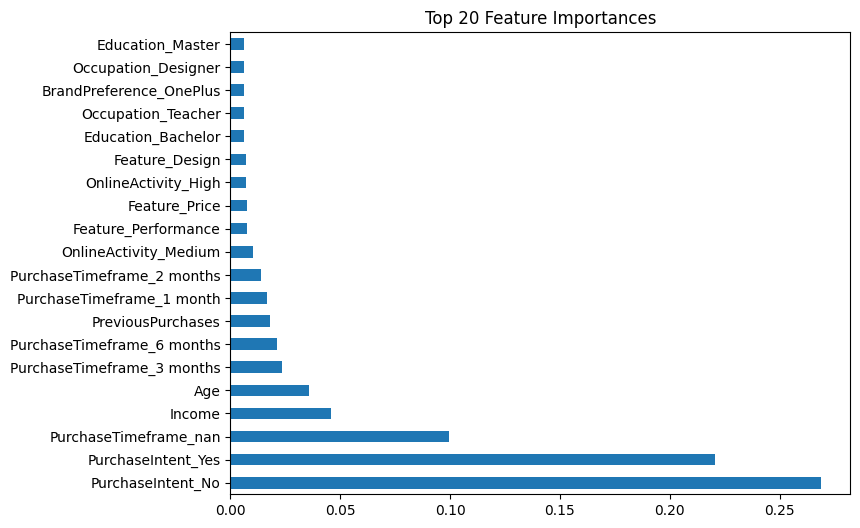

In [28]:
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
ohe = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_cols)
num_features = ['Age', 'Income', 'PreviousPurchases'] + [f'Feature_{f}' for f in features]
all_features = np.concatenate([cat_features, num_features])
feature_importance = pd.Series(importances, index=all_features).sort_values(ascending=False)
feature_importance.head(20).plot(kind='barh', figsize=(8,6), title='Top 20 Feature Importances')
plt.show()

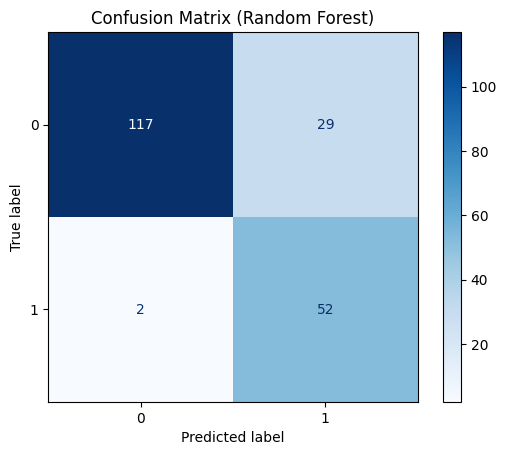

In [29]:
y_pred_best_rf = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Random Forest)")
plt.show()